# StyleGAN latent space exploration 

## План работы:
1. Генерация рандомных лиц с помощью StyleGAN 2 
2. Исследование разных методовов инверсии  
3. Визуализация точек из латентного пространства и анализ результатов
4. Манипуляции с векторами   


## Install dependencies

In [1]:
!unzip celebs.zip
!unzip editing.zip

Archive:  celebs.zip
   creating: celebs/
   creating: celebs/AJoly/
  inflating: celebs/AJoly/34c7bef704ac52844e402f6b9b804904.jpg  
  inflating: celebs/AJoly/andzhelina-dzholi-press-konferenciya-neslomlennaya.jpg  
  inflating: celebs/AJoly/67d860b7b0c3be3b216d3d1d059ad424.jpg  
  inflating: celebs/AJoly/f60a8c8e515a1f63c7444842e004447c.jpg  
  inflating: celebs/AJoly/b11ec6657c1d1e413b326e746fd35151.jpg  
   creating: celebs/EMerphy/
  inflating: celebs/EMerphy/kinodrive.com-271-123172.jpg  
  inflating: celebs/EMerphy/18659.jpg  
  inflating: celebs/EMerphy/140.jpg  
  inflating: celebs/EMerphy/2.63451136-1537x2048.jpg  
  inflating: celebs/EMerphy/bolshoj-papochka-57-letnij-eddi-merfi-stanet-otcom-v-desyatyj-raz.jpg  
   creating: celebs/Stethem/
  inflating: celebs/Stethem/stethem6.jpg  
  inflating: celebs/Stethem/1646466328_27-damion-club-p-dzheison-stetkhem-art-29.jpg  
  inflating: celebs/Stethem/stethem7.jpg  
  inflating: celebs/Stethem/24108-djeyson_stethem.jpg  
  inflati

In [2]:
!pip install ninja
!pip install imageio-ffmpeg
!pip install -U -q PyDrive
!pip install lpips
!pip install pytorch_msssim
!pip install pytorch-ignite


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

%mkdir raw_images
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch
%cd stylegan2-ada-pytorch
!git clone https://github.com/denkogit/stylegan2_models


!mkdir pretrained_models
%cd pretrained_models
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
!wget https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/stylegan2-ada-pytorch/pretrained_models/shape_predictor_68_face_landmarks.dat.bz2

file_id = '1cUv_reLE6k3604or78EranS7XzuVMWeO' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('e4e_ffhq_encode.pt')

%cd ..

# ref https://github.com/Puzer/stylegan-encoder/blob/master/align_images.py
# !git clone https://github.com/omertov/encoder4editing


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 5.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 KB 2.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 KB 7.0 MB/s eta 0:00:00
Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 1.12 MiB | 7.17 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylega

# StyleGAN face generation

## Original repository 

1. Разбор кода stylegan https://nn.labml.ai/gan/stylegan/index.html
2. Официальный репозиторий stylegan2 https://github.com/NVlabs/stylegan2-ada-pytorch

In [ ]:
!python3 generate.py --outdir=out --trunc=0.7 --network=pretrained_models/ffhq.pkl --seeds=100

In [ ]:
!python3 projector.py --outdir=out --num-steps=300 --target=/content/aligned_images/jason_01.png --network=pretrained_models/ffhq.pkl

In [ ]:
!rm -r out

## StyleGAN Code 

In [9]:
device = "cuda:0"
model_path = "/content/stylegan2-ada-pytorch/pretrained_models/ffhq.pkl"

import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def plot_image(tensor, plot_size=(10,10)):
  tensor = (tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
  img = Image.fromarray(tensor[0].cpu().numpy(), 'RGB')
  plt.rcParams["figure.figsize"] = plot_size
  plt.imshow(img)


def broadcast_w_sg(w_batch, cast_n=18):
    input_ws = []
    for w in w_batch:   
        w_broadcast = torch.broadcast_to(w, (cast_n, 512))
        input_ws.append(w_broadcast)
    return torch.stack(input_ws)


with open(model_path, 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()

truncation

интерполяция в сторону среднего вектора 

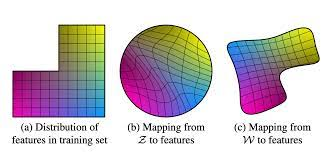

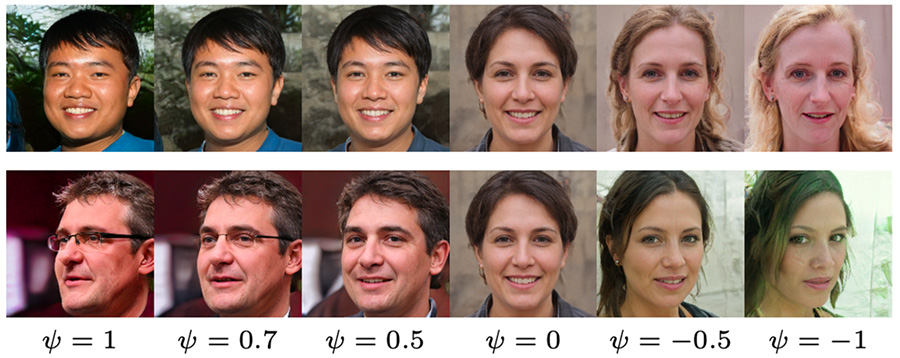

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


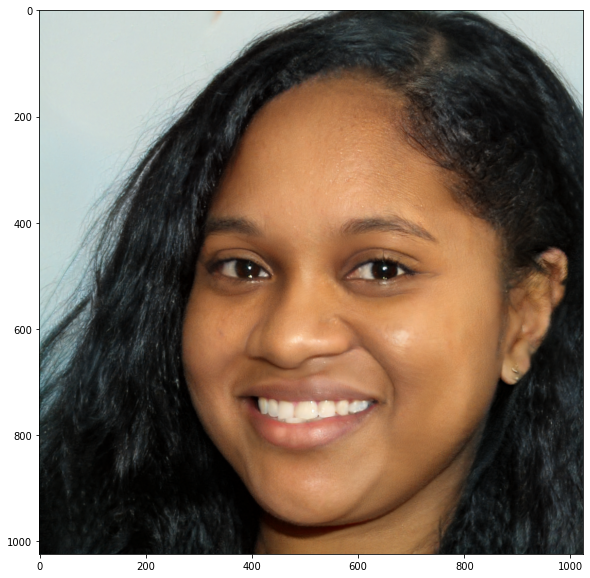

In [4]:
seed = 100
noise_mode = 'const' # шум
label = 0 # для разных моделей

z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to(device)
ws = G.mapping(z, label, truncation_psi=(1))
generated_tensor = G.synthesis(ws, noise_mode=noise_mode, force_fp32=True)
plot_image(generated_tensor)


## Align images

In [4]:
import os 
from stylegan2_models.image_aligner.face_alignment import image_align
from stylegan2_models.image_aligner.landmarks_detector import LandmarksDetector


landmarks_model_path = "/content/stylegan2-ada-pytorch/pretrained_models/shape_predictor_68_face_landmarks.dat"
RAW_IMAGES_DIR = "/content/celebs"
ALIGNED_IMAGES_DIR = "/content/aligned_images"

landmarks_detector = LandmarksDetector(landmarks_model_path)
for celeb in os.listdir(RAW_IMAGES_DIR):
  celeb_folder = os.path.join(RAW_IMAGES_DIR, celeb)
  save_path = os.path.join(ALIGNED_IMAGES_DIR, celeb)
  os.makedirs(save_path, exist_ok=True)
  for i, img_name in enumerate(os.listdir(celeb_folder)):
      if img_name == ".ipynb_checkpoints":
        continue
      raw_img_path = os.path.join(celeb_folder, img_name)
      for face_landmarks in landmarks_detector.get_landmarks(raw_img_path):
          aligned_face_path = os.path.join(save_path, f"{i}.jpg")
          image_align(raw_img_path, aligned_face_path, face_landmarks)
          break

## Projection of real images 

https://oscar-guarnizo.medium.com/review-image2stylegan-embedding-an-image-into-stylegan-c7989e345271

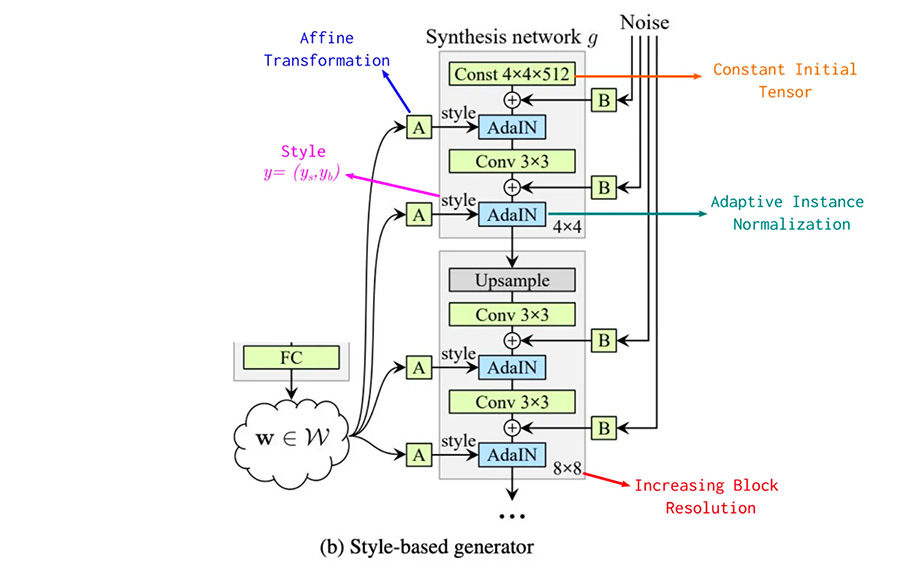

Проекция это поиск точки в латентном пространстве которая визуально будет похожа на реальное изображение 


### Latent optimization

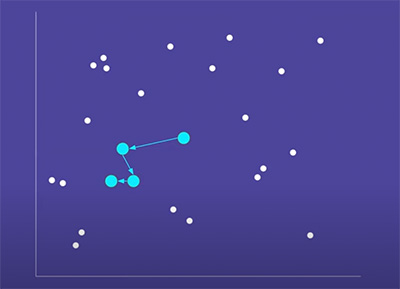

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.9/dist-packages/lpips/weights/v0.1/vgg.pth
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
0.8339986205101013


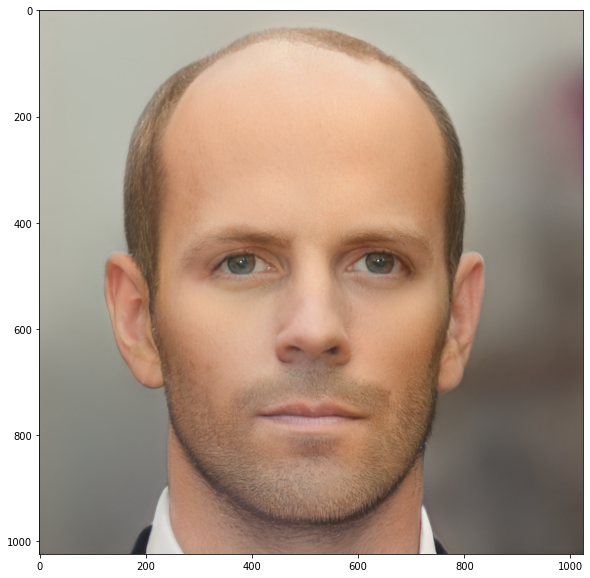

In [3]:
import PIL
import os
import numpy as np
import torch
import lpips
import torch.nn as nn
import torchvision.transforms as transforms
from pytorch_msssim import ms_ssim


# https://pypi.org/project/pytorch-msssim/
class Rec_loss(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1_criterion = torch.nn.L1Loss(reduction='mean')

    def forward(self, target, synth):
      
        target = torch.add(target, 1.0)
        target = torch.mul(target, 127.5)
        target = target / 255

        synth = torch.add(synth, 1.0)
        synth = torch.mul(synth, 127.5)
        synth = synth / 255

        loss = torch.mean(1 - ms_ssim(synth, target, data_range=1, size_average=True))
        return loss
    

# https://pypi.org/project/lpips/
class Lpips_loss(nn.Module):
    def __init__(self, device):
        super().__init__()
        self.lpips_loss = lpips.LPIPS(net='vgg')
        self.lpips_loss.to(device)
        self.lpips_loss.eval()
      
    def forward(self, target, synth):
        return torch.mean(self.lpips_loss(target, synth))


def image2tensor_norm(image):
    transform = transforms.Compose([transforms.ToTensor(), 
                                   transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
    tensor = transform(image)
    return tensor

# загружаем изображение
inv_img_path = "/content/aligned_images/Stethem/0.jpg"
target_pil = PIL.Image.open(inv_img_path).convert('RGB')
target_tensor = image2tensor_norm(target_pil).to(device).unsqueeze(0)

# инициализируем функции потерь 
lpips = Lpips_loss(device)
rec = Rec_loss()

# Параметры для оптимизации
num_steps = 150
seed = 42 
initial_learning_rate = 0.05
w_avg_samples = 10000

# Получаем средний вектор латентного пространства
z_samples = torch.from_numpy(np.random.RandomState(seed).randn(w_avg_samples, G.z_dim)).to(device)
w_samples = G.mapping(z_samples, None)
w_samples = w_samples[:, :1, :].cpu().numpy().astype(np.float32) 
w_avg = np.mean(w_samples, axis=0, keepdims=True)      # [1, 1, C]
w_std = (np.sum((w_samples - w_avg) ** 2) / w_avg_samples) ** 0.5

# w_plus vector
# w_opt = torch.tensor(w_avg, dtype=torch.float32, device=device, requires_grad=False) # pylint: disable=not-callable
# w_opt = broadcast_w_sg(w_opt).requires_grad_(True)
w_opt = torch.tensor(w_avg, dtype=torch.float32, device=device, requires_grad=True) # pylint: disable=not-callable


optimizer = torch.optim.Adam([w_opt], lr=initial_learning_rate)

for step in range(num_steps):
  synth_tensor = G.synthesis(broadcast_w_sg(w_opt), noise_mode='const')
  
  lpips_loss = lpips(synth_tensor, target_tensor)
  rec_loss = rec(synth_tensor, target_tensor)

  loss = lpips_loss + rec_loss

  optimizer.step()
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  

generated_tensor = G.synthesis(broadcast_w_sg(w_opt), noise_mode='const', force_fp32=True)
plot_image(generated_tensor)
print(loss.item())

In [118]:
w_avg_samples = 10000
z_samples = torch.from_numpy(np.random.RandomState(seed).randn(w_avg_samples, G.z_dim)).to(device)
w_samples = G.mapping(z_samples, None)
w_samples = w_samples[:, :1, :].cpu().numpy().astype(np.float32) 
w_avg = np.mean(w_samples, axis=0, keepdims=True)      # [1, 1, C]
w_std = (np.sum((w_samples - w_avg) ** 2) / w_avg_samples) ** 0.5

# w_plus vector
# w_opt = torch.tensor(w_avg, dtype=torch.float32, device=device, requires_grad=False) # pylint: disable=not-callable
# w_opt = broadcast_w_sg(w_opt).requires_grad_(True)
w_opt = torch.tensor(w_avg, dtype=torch.float32, device=device, requires_grad=True) # pylint: disable=no
w_opt.shape

torch.Size([1, 1, 512])

In [71]:
w_opt.shape

NameError: ignored

### Encoder for editing

https://arxiv.org/pdf/2102.02766.pdf

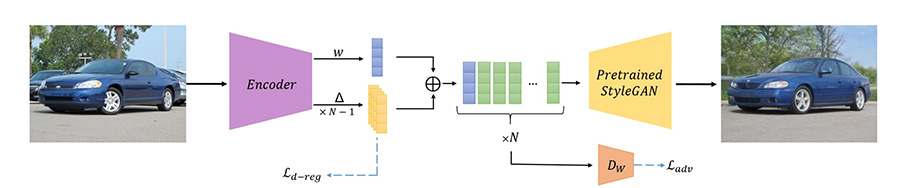

In [2]:
from stylegan2_models.e4e.model_utils import load_e4e_standalone
import torchvision.transforms as transforms

e4e_model, _ = load_e4e_standalone("/content/stylegan2-ada-pytorch/pretrained_models/e4e_ffhq_encode.pt")

image2e4etensor = transforms.Compose([transforms.ToTensor(), 
                                transforms.Resize((256, 256)),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])


ModuleNotFoundError: ignored

In [5]:
image_path = "/content/aligned_images/Stethem/0.jpg"
target_pil = Image.open(image_path).convert('RGB')
target_uint8 = np.array(target_pil, dtype=np.uint8)

e4e_tensor = image2e4etensor(target_uint8).to(device).unsqueeze(0)
initial_latent_vector = e4e_model(e4e_tensor)

In [1]:
e4e_model

NameError: ignored

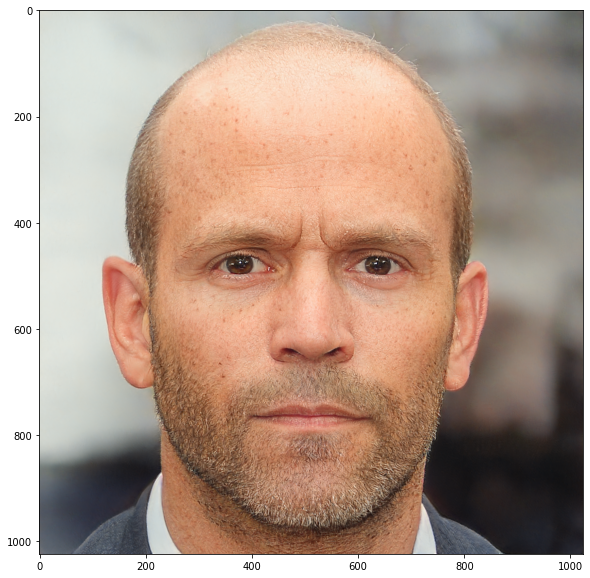

In [6]:
generated_tensor = G.synthesis(initial_latent_vector, noise_mode='const', force_fp32=True)
plot_image(generated_tensor)

## Plot latent using PCA

Метод главных компонент

https://habr.com/ru/post/304214/

In [10]:
import os
import glob
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox



images_path = "/content/aligned_images"
save_path = "/content/e4e_invertion"

data = []
for persone in sorted(os.listdir(images_path)):
    person_images = os.path.join(images_path, persone)
    save_folder = os.path.join(save_path, persone)
    os.makedirs(save_folder, exist_ok=True)

    for image_name in os.listdir(person_images):
      image_path = os.path.join(person_images, image_name)

      target_pil = Image.open(image_path).convert('RGB')
      target_uint8 = np.array(target_pil, dtype=np.uint8)

      e4e_tensor = image2e4etensor(target_uint8).to(device).unsqueeze(0)
      
      latent_vector = e4e_model(e4e_tensor).detach().cpu()
      latent_path = os.path.join(save_folder, f"{image_name[:-3]}.pt")

      torch.save(latent_vector, latent_path)
      data.append([persone, image_name, image_path, latent_path])

df = pd.DataFrame(data, columns = ['key', 'image_name', 'image_path', 'latent_path'])

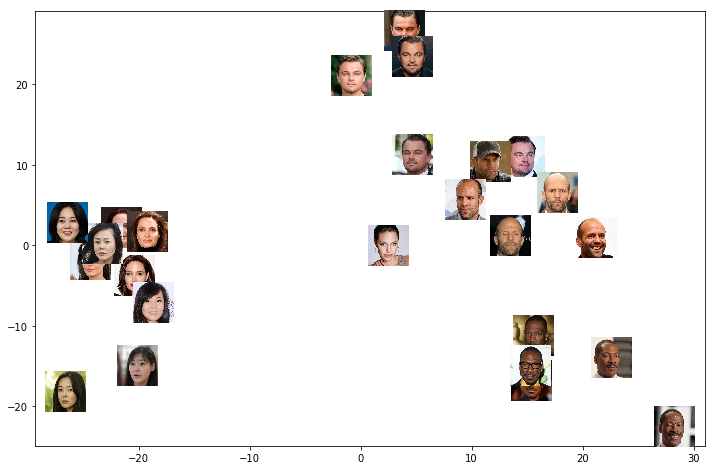

In [11]:

def getImage(path, zoom=0.04):
    return OffsetImage(plt.imread(path), zoom=zoom)

embedings = []
for index, row in df.iterrows():
    latent_path = row["latent_path"]
    latent = torch.load(latent_path).numpy().squeeze(0)
    embedings.append(latent)


batch = np.stack(embedings, axis=0)
batch = batch.reshape((25, 9216))
pca = PCA(n_components=2, random_state=22).fit(batch)
x = pca.transform(batch)


fig, ax = plt.subplots(figsize=(12,8))
# for x, y, path in zip(x[:, 0], x[:, 1], df.image_path.values.tolist()):
for x, y, df_iter in zip(x[:, 0], x[:, 1], df.iterrows()):
  i, row = df_iter
  path = row["image_path"]
  label = row["key"]
  ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
  ax.add_artist(ab) 
  plt.scatter(x,y, label=label)

# plt.legend()
plt.show()




## Interpolation and editing

In [6]:
from IPython.display import display, FileLink
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import torch



def interpolate(latent1, latent2, psi=0.5):
    latent1 = latent1.clone()
    latent2 = latent2.clone()
    # indeces = [5,6,7,8,9,10,11,12]
    indeces = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
    for i in indeces:
        latent1[:, i] = latent2[:, i].lerp(latent1[:, i], psi)
    
    generated_tensor = G.synthesis(latent1, noise_mode='const', force_fp32=True)
    plot_image(generated_tensor)



latent1=torch.load("/content/e4e_invertion/AJoly/0..pt").to(device)
latent2=torch.load("/content/editing/pose.pt").to(device)

# print(x.size())

interactive(interpolate, latent1=fixed(latent1), latent2=fixed(latent2), 
            psi=widgets.FloatSlider(value=0.5, min=-1.0, max=1.0, step=0.1))


interactive(children=(FloatSlider(value=0.5, description='psi', max=1.0, min=-1.0), Output()), _dom_classes=('…

# Homework

In [7]:
file_id = '1QIPdkYyIwqEUS8jBNouWo9eYzr3DwDd5' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('ms1mv3_arcface_r50_fp16.pth')


In [3]:
import PIL
import os
import numpy as np
import torch
import lpips
import torch.nn as nn
import torchvision.transforms as transforms
from pytorch_msssim import ms_ssim
from stylegan2_models.arcface_model import get_model
import torch.nn.functional as F

from stylegan2_models.e4e.model_utils import load_e4e_standalone
import torchvision.transforms as transforms

e4e_model, _ = load_e4e_standalone("/content/stylegan2-ada-pytorch/pretrained_models/e4e_ffhq_encode.pt")


image2e4etensor = transforms.Compose([transforms.ToTensor(), 
                                transforms.Resize((256, 256)),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])



def image2tensor_norm(image):
    transform = transforms.Compose([transforms.ToTensor(), 
                                   transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
    tensor = transform(image)
    return tensor


def truncation(latent1, latent2, psi=0.5):
    latent1 = latent1.clone()
    latent2 = latent2.clone()
    # indeces = [5,6,7,8,9,10,11,12]
    indeces = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
    for i in indeces:
        latent1[:, i] = latent2[:, i].lerp(latent1[:, i], psi)
    return latent1


class Rec_loss(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1_criterion = torch.nn.L1Loss(reduction='mean')


    def forward(self, target, synth):
      
        target = torch.add(target, 1.0)
        target = torch.mul(target, 127.5)
        target = target / 255

        synth = torch.add(synth, 1.0)
        synth = torch.mul(synth, 127.5)
        synth = synth / 255

        loss = torch.mean(1 - ms_ssim(synth, target, data_range=1, size_average=True))
        return loss
    


class Lpips_loss(nn.Module):
    def __init__(self, device):
        super().__init__()
        self.lpips_loss = lpips.LPIPS(net='vgg')
        self.lpips_loss.to(device)
        self.lpips_loss.eval()
      
    def forward(self, target, synth):
        return torch.mean(self.lpips_loss(target, synth))



class Arcface_Loss(nn.Module):
    def __init__(self, weights_path, device):
        super().__init__()
        self.arcnet = get_model("r50", fp16=False)
        self.arcnet.load_state_dict(torch.load(weights_path))
        self.arcnet.eval()
        self.arcnet.to(device)
        self.cosin_loss = nn.CosineSimilarity(dim=1, eps=1e-6)

    def forward(self, source, synth):

        source = F.interpolate(source,size=(112,112), mode='bicubic')
        synth = F.interpolate(synth,size=(112,112), mode='bicubic')

        emb1 = self.arcnet(source)
        emb2 = self.arcnet(synth)
        loss = (1 - self.cosin_loss(emb1, emb2))[0]
        return loss

# https://drive.google.com/file/d/1QIPdkYyIwqEUS8jBNouWo9eYzr3DwDd5/view?usp=sharing ссылка на загрузку весов 
arcface_path = "/content/stylegan2-ada-pytorch/ms1mv3_arcface_r50_fp16.pth"
attr_path  = "/content/aligned_images/Stethem/0.jpg"
id_path = "/content/aligned_images/AJoly/0.jpg"

# 1. Открыть изображения и нормализовать
# 2. Инициализировать функции потерь 
# 3. Получить стартовую точку (пробовать разные способы: e4e, средний вектор, интерполяция между векторами)
# 4. Пробовать разные функции потерь, можно пробовать свои 
# 5. Результат конкатенация трех картинок в одну target, source, swap
# 6. Буду обращать внимание в первую очередь на угол поворота и уже потом на узнаваемость id

# * заменить на полный кадр 
# https://github.com/zllrunning/face-parsing.PyTorch


# подразумевается свобода выбора, мы посмотрели разные виды поиска вектора в латентном пространстве теперь, нужно подумать какой из этих вариантов приведет к желаемому результату.
# Вот эксперименты которые можно провести:
# 1. Сразу начать оптимизацию с нуля т.е брать за начальную точку средний латент или рандомный и считать лосс id от Сталлоне, а атрибуты (цвет кожи поворот и тд ) со Стэтхэма.
# 2. В качестве стартовой точки взять другой вектор, например инверсию сталоне или интерполяция между инвенсиями и тд и сделать тоже самое.

# Смысл в том чтобы выписать список гипотез, проверить их и выяснить что из этого лучше работает

In [5]:
image2e4etensor = transforms.Compose([transforms.ToTensor(), 
                                transforms.Resize((256, 256)),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

In [6]:
imageetensor = transforms.Compose([transforms.ToTensor(), 
                                transforms.Resize((256, 256)),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

In [7]:
num_steps = 150
seed = 42 
initial_learning_rate = 0.05

In [23]:
# 1. Открыть изображения и нормализовать
inv_img_path = "/content/aligned_images/Stethem/0.jpg"
sorce_pil = PIL.Image.open(inv_img_path).convert('RGB')
source_tensor = image2tensor_norm(sorce_pil).unsqueeze(0).to(device)

In [24]:
image_path = "/content/aligned_images/LDCaprio/0.jpg"
target_pil = Image.open(image_path).convert('RGB')
transform = transforms.Compose([transforms.ToTensor(), 
                                   transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
target_tensor = transform(target_pil).to(device).view(1,3,1024,1024)
target_tensor.shape

torch.Size([1, 3, 1024, 1024])

In [35]:
# 2. Инициализировать функции потерь
import lpips
arcPath = '/content/ms1mv3_arcface_r50_fp16.pth'
rec = Rec_loss()
llpip = Lpips_loss(device)
arcFace = Arcface_Loss(arcPath, device)

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.9/dist-packages/lpips/weights/v0.1/vgg.pth


In [26]:
# 3. Получить стартовую точку (пробовать разные способы: e4e, средний вектор, интерполяция между векторами)
source_tensor = e4e_model(source_tensor).mean(axis=0).view(1,18,512).clone().detach().requires_grad_(True)
source_tensor.shape


torch.Size([1, 18, 512])

In [12]:
torch.cuda.empty_cache()

In [27]:
synth_tensor = G.synthesis(source_tensor, noise_mode='const')

In [ ]:
synth_tensor.shape

In [29]:
arcFace(synth_tensor,target_tensor)

tensor(0.8509, device='cuda:0', grad_fn=<SelectBackward0>)

In [63]:
torch.load("/content/e4e_invertion/AJoly/0..pt").to(device).shape

torch.Size([1, 18, 512])

In [107]:
target_tensor.shape, synth_tensor.shape

(torch.Size([3, 1024, 1024]), torch.Size([1, 3, 1024, 1024]))

# rec_loss + lpips_loss(200 epochs)

0.6428462862968445


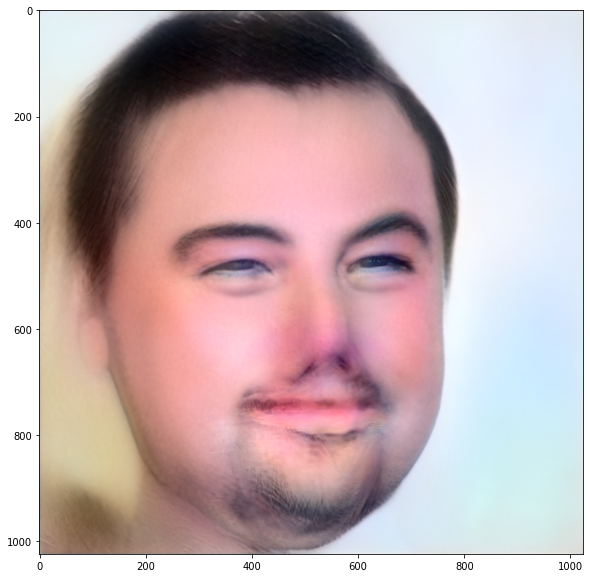

In [49]:
# 4. Пробовать разные функции потерь, можно пробовать свои
optimizer = torch.optim.Adam([source_tensor], lr=initial_learning_rate)

for step in range(200):
  synth_tensor = G.synthesis(source_tensor, noise_mode='const')
  
  lpips_loss = llpip(synth_tensor, target_tensor)
  rec_loss = rec(synth_tensor, target_tensor)

  loss = lpips_loss + rec_loss # 

  optimizer.step()
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  

generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
plot_image(generated_tensor)
print(loss.item())

<Figure size 720x720 with 0 Axes>

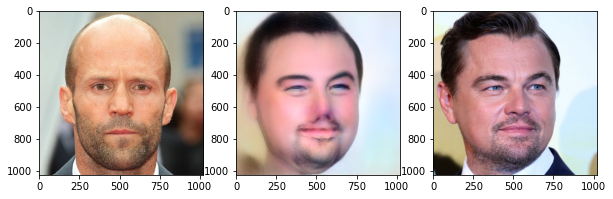

In [50]:
generated_tensor = G.synthesis(broadcast_w_sg(source_tensor), noise_mode='const', force_fp32=True)
generated_tensor = (generated_tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img = Image.fromarray(generated_tensor[0].cpu().numpy(), 'RGB')
plt.figure()
f, axarr = plt.subplots(1,3) 
axarr[0].imshow(sorce_pil)
axarr[1].imshow(img)
axarr[2].imshow(target_pil)

# rec_loss + lpips_loss(300 epochs)

0.589245617389679


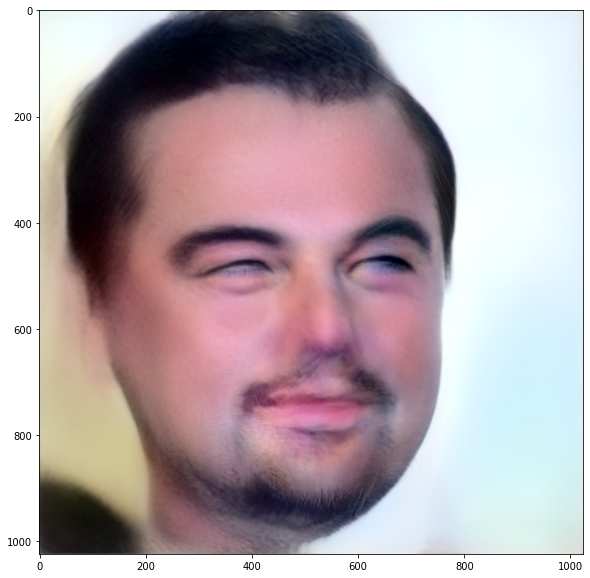

In [56]:
optimizer = torch.optim.Adam([source_tensor], lr=initial_learning_rate)

for step in range(300):
  synth_tensor = G.synthesis(source_tensor, noise_mode='const')
  
  lpips_loss = llpip(synth_tensor, target_tensor)
  rec_loss = rec(synth_tensor, target_tensor)

  loss = lpips_loss + rec_loss # 

  optimizer.step()
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  

generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
plot_image(generated_tensor)
print(loss.item())

<Figure size 720x720 with 0 Axes>

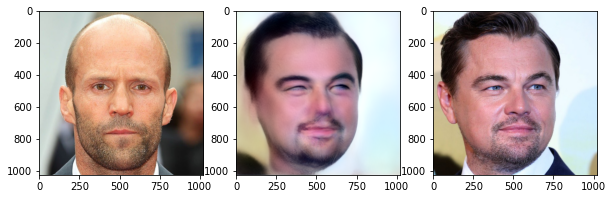

In [57]:
generated_tensor = G.synthesis(broadcast_w_sg(source_tensor), noise_mode='const', force_fp32=True)
generated_tensor = (generated_tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img = Image.fromarray(generated_tensor[0].cpu().numpy(), 'RGB')
plt.figure()
f, axarr = plt.subplots(1,3) 
axarr[0].imshow(sorce_pil)
axarr[1].imshow(img)
axarr[2].imshow(target_pil)

# rec_loss(200 epochs)

0.6428462862968445


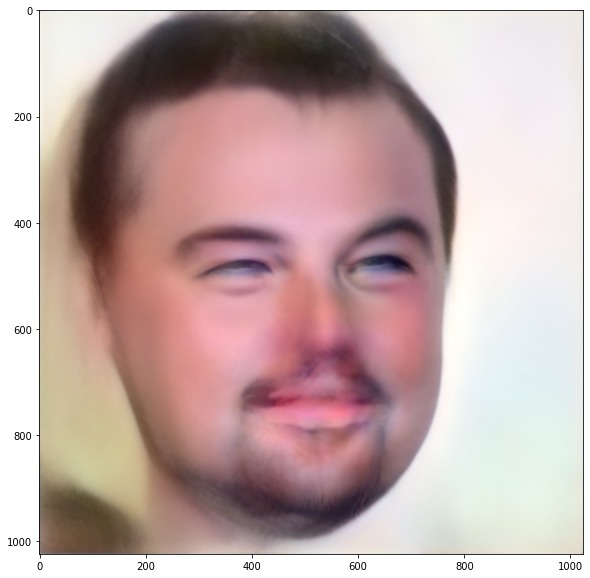

In [51]:
optimizer = torch.optim.Adam([source_tensor], lr=initial_learning_rate)

for step in range(200):
  synth_tensor = G.synthesis(source_tensor, noise_mode='const')

  rec_loss = rec(synth_tensor, target_tensor) 

  optimizer.step()
  optimizer.zero_grad(set_to_none=True)
  rec_loss.backward()
  

generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
plot_image(generated_tensor)
print(loss.item())

<Figure size 720x720 with 0 Axes>

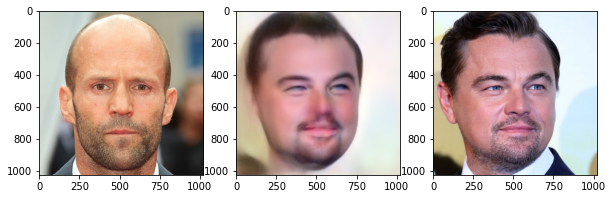

In [53]:
generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
generated_tensor = (generated_tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img = Image.fromarray(generated_tensor[0].cpu().numpy(), 'RGB')
plt.figure()
f, axarr = plt.subplots(1,3) 
axarr[0].imshow(sorce_pil)
axarr[1].imshow(img)
axarr[2].imshow(target_pil)

# lpips_loss(200 epochs)

0.6428462862968445


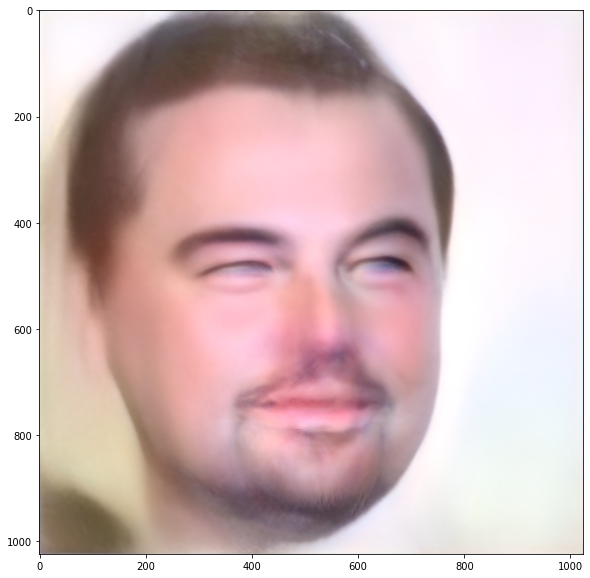

In [54]:
optimizer = torch.optim.Adam([source_tensor], lr=initial_learning_rate)

for step in range(200):
  synth_tensor = G.synthesis(source_tensor, noise_mode='const')

  lpips_loss = llpip(synth_tensor, target_tensor)

  optimizer.step()
  optimizer.zero_grad(set_to_none=True)
  lpips_loss.backward()
  

generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
plot_image(generated_tensor)
print(loss.item())

<Figure size 720x720 with 0 Axes>

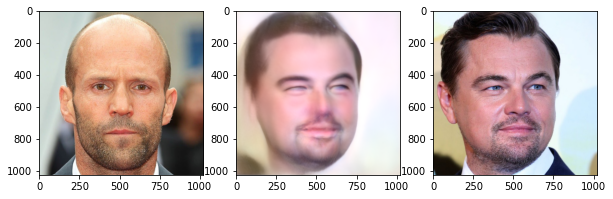

In [55]:
generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
generated_tensor = (generated_tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img = Image.fromarray(generated_tensor[0].cpu().numpy(), 'RGB')
plt.figure()
f, axarr = plt.subplots(1,3) 
axarr[0].imshow(sorce_pil)
axarr[1].imshow(img)
axarr[2].imshow(target_pil)

# arcFace_loss(200 epochs)

5.960464477539063e-08


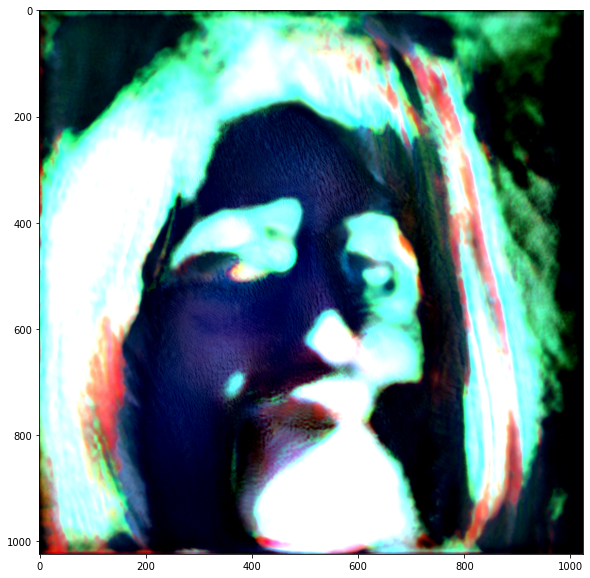

In [39]:
optimizer = torch.optim.Adam([source_tensor], lr=initial_learning_rate)

for step in range(200):
  synth_tensor = G.synthesis(source_tensor, noise_mode='const')

  criterion = arcFace(synth_tensor, synth_tensor)

  optimizer.step()
  optimizer.zero_grad(set_to_none=True)
  criterion.backward()
  

generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
plot_image(generated_tensor)
print(criterion.item())

<Figure size 720x720 with 0 Axes>

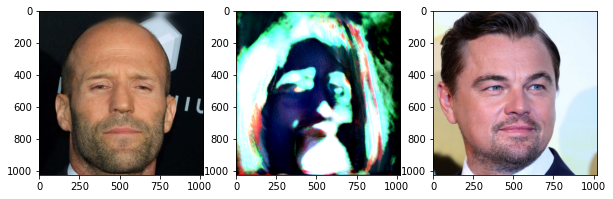

In [40]:
generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
generated_tensor = (generated_tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img = Image.fromarray(generated_tensor[0].cpu().numpy(), 'RGB')
plt.figure()
f, axarr = plt.subplots(1,3) 
axarr[0].imshow(sorce_pil)
axarr[1].imshow(img)
axarr[2].imshow(target_pil)

# arcFace_loss + lpips_loss + rec_loss(200 epochs)

0.8366345763206482


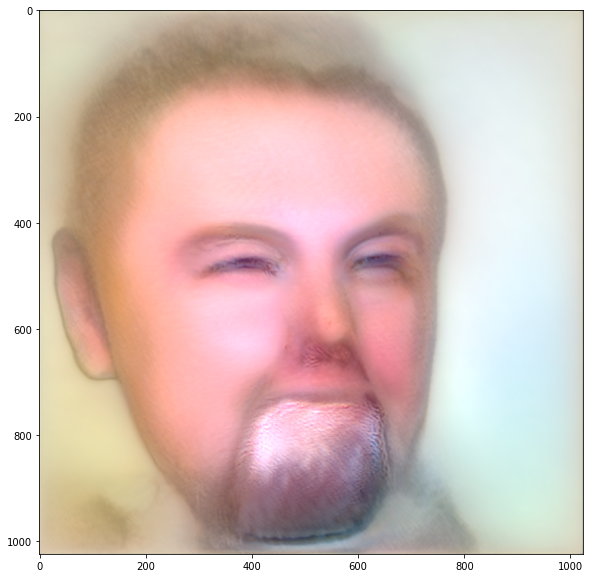

In [41]:
optimizer = torch.optim.Adam([source_tensor], lr=initial_learning_rate)

for step in range(200):
  synth_tensor = G.synthesis(source_tensor, noise_mode='const')

  criterion = arcFace(synth_tensor, synth_tensor) + llpip(synth_tensor, target_tensor) + rec(synth_tensor, target_tensor) 

  optimizer.step()
  optimizer.zero_grad(set_to_none=True)
  criterion.backward()
  

generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
plot_image(generated_tensor)
print(criterion.item())

<Figure size 720x720 with 0 Axes>

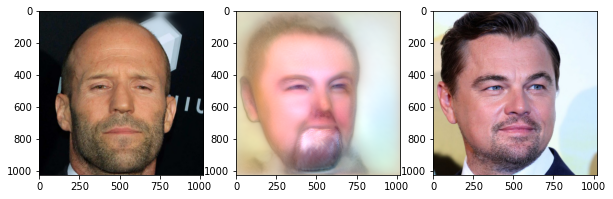

In [42]:
generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
generated_tensor = (generated_tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img = Image.fromarray(generated_tensor[0].cpu().numpy(), 'RGB')
plt.figure()
f, axarr = plt.subplots(1,3) 
axarr[0].imshow(sorce_pil)
axarr[1].imshow(img)
axarr[2].imshow(target_pil)

# Stethem + JunJin


In [43]:
inv_img_path = "/content/aligned_images/Stethem/0.jpg"
sorce_pil = PIL.Image.open(inv_img_path).convert('RGB')
source_tensor = image2tensor_norm(sorce_pil).unsqueeze(0).to(device)

In [45]:
image_path = "/content/aligned_images/KJunJin/0.jpg"
target_pil = Image.open(image_path).convert('RGB')
transform = transforms.Compose([transforms.ToTensor(), 
                                   transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
target_tensor = transform(target_pil).to(device).view(1,3,1024,1024)
target_tensor.shape

torch.Size([1, 3, 1024, 1024])

In [46]:
source_tensor = e4e_model(source_tensor).mean(axis=0).view(1,18,512).clone().detach().requires_grad_(True)
source_tensor.shape

torch.Size([1, 18, 512])

0.7450974583625793


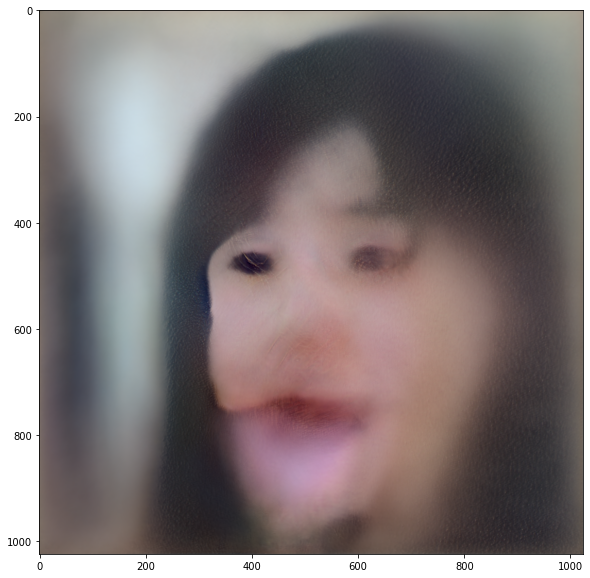

In [47]:
optimizer = torch.optim.Adam([source_tensor], lr=initial_learning_rate)

for step in range(200):
  synth_tensor = G.synthesis(source_tensor, noise_mode='const')

  criterion = arcFace(synth_tensor, synth_tensor) + llpip(synth_tensor, target_tensor) + rec(synth_tensor, target_tensor) 

  optimizer.step()
  optimizer.zero_grad(set_to_none=True)
  criterion.backward()
  

generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
plot_image(generated_tensor)
print(criterion.item())

<Figure size 720x720 with 0 Axes>

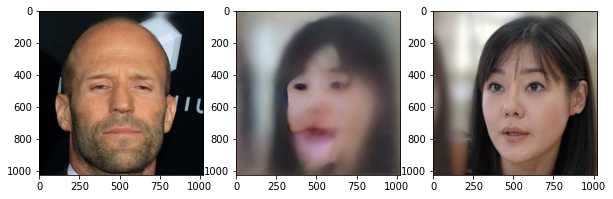

In [48]:
generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
generated_tensor = (generated_tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img = Image.fromarray(generated_tensor[0].cpu().numpy(), 'RGB')
plt.figure()
f, axarr = plt.subplots(1,3) 
axarr[0].imshow(sorce_pil)
axarr[1].imshow(img)
axarr[2].imshow(target_pil)

с arcFace нужно больше эпох для обучения

0.5765684843063354


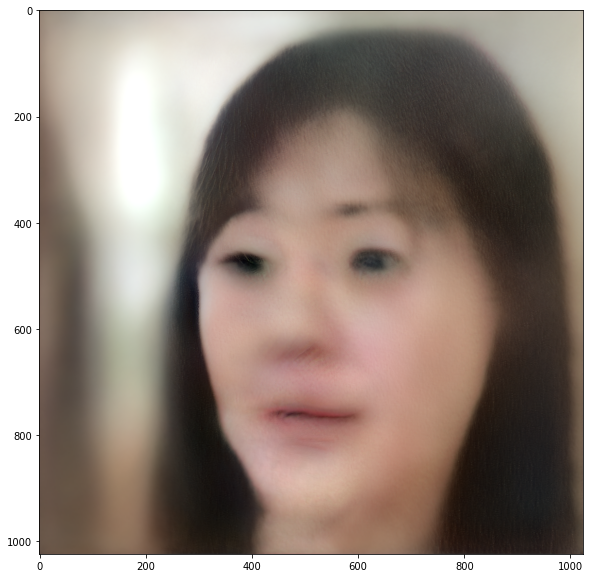

In [50]:
optimizer = torch.optim.Adam([source_tensor], lr=initial_learning_rate)

for step in range(500):
  synth_tensor = G.synthesis(source_tensor, noise_mode='const')

  criterion = arcFace(synth_tensor, synth_tensor) + llpip(synth_tensor, target_tensor) + rec(synth_tensor, target_tensor) 

  optimizer.step()
  optimizer.zero_grad(set_to_none=True)
  criterion.backward()
  

generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
plot_image(generated_tensor)
print(criterion.item())

<Figure size 720x720 with 0 Axes>

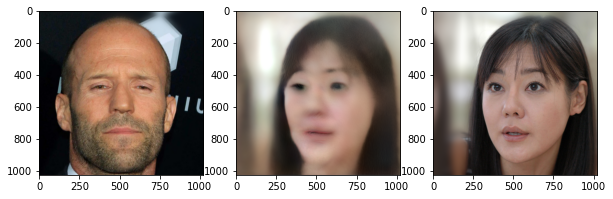

In [51]:
generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
generated_tensor = (generated_tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img = Image.fromarray(generated_tensor[0].cpu().numpy(), 'RGB')
plt.figure()
f, axarr = plt.subplots(1,3) 
axarr[0].imshow(sorce_pil)
axarr[1].imshow(img)
axarr[2].imshow(target_pil)

# без ArcFace

0.6687102317810059


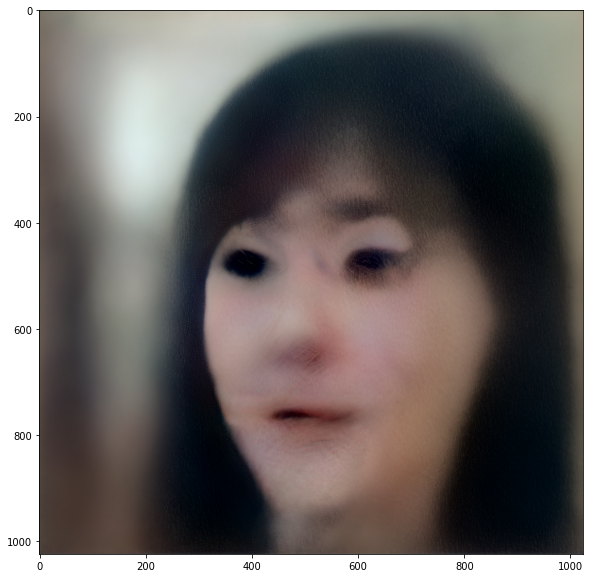

In [49]:
optimizer = torch.optim.Adam([source_tensor], lr=initial_learning_rate)

for step in range(200):
  synth_tensor = G.synthesis(source_tensor, noise_mode='const')

  criterion = llpip(synth_tensor, target_tensor) + rec(synth_tensor, target_tensor) 

  optimizer.step()
  optimizer.zero_grad(set_to_none=True)
  criterion.backward()
  

generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
plot_image(generated_tensor)
print(criterion.item())

<Figure size 720x720 with 0 Axes>

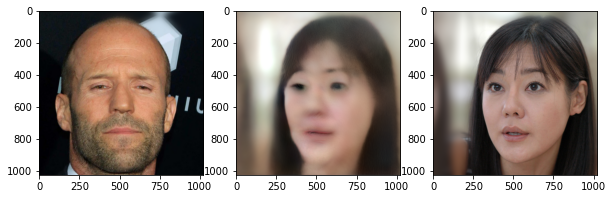

In [52]:
generated_tensor = G.synthesis(source_tensor, noise_mode='const', force_fp32=True)
generated_tensor = (generated_tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img = Image.fromarray(generated_tensor[0].cpu().numpy(), 'RGB')
plt.figure()
f, axarr = plt.subplots(1,3) 
axarr[0].imshow(sorce_pil)
axarr[1].imshow(img)
axarr[2].imshow(target_pil)